In [24]:
# 결과를 출력하는 함수
# 문자가 들어있는 이미지, 추출 결과, 폰트
def result_ocr(img_path, result):
    font = "./font/Hancom Gothic Regular.ttf"

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 추출된 결과로부터 값을 가져온다 
    # (문자가 있는 바운딩 박스 좌표, 추출된 문자, 신뢰도)
    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]

    # 추출된 내용을 출력
    im_show = draw_ocr(img, boxes, txts, scores, font_path=font)

    plt.imshow(im_show)
    plt.axis("off")

In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow
# PaddleOCR : 문자인식 라이브러리
# draw_ocr : 인식된 결과를 출력하는 함수
from paddleocr import PaddleOCR, draw_ocr
# lang : ch, en, french, german, korean, japan
ocr = PaddleOCR(use_angle_cls=True, lang="en")
ocr_ko = PaddleOCR(use_angle_cls=True, lang="korean")

[2022/12/13 14:58:07] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\gjaischool-80/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\gjaischool-80/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_

In [50]:
import os

root_dir = "./runs/detect/result/5m/carnum/" # 디렉토리
 
carnumimg_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                carnumimg_path_list.append(img_path)
                             
print(carnumimg_path_list)

['./runs/detect/result/5m/carnum//car2 copy.png', './runs/detect/result/5m/carnum//car2.png']


In [51]:
import os
val_img_path = carnumimg_path_list
print(val_img_path)

['./runs/detect/result/5m/carnum//car2 copy.png', './runs/detect/result/5m/carnum//car2.png']


In [63]:
carnum = []

[2022/12/13 15:05:14] ppocr DEBUG: dt_boxes num : 6, elapse : 0.04589700698852539
[2022/12/13 15:05:14] ppocr DEBUG: cls num  : 6, elapse : 0.06582379341125488
[2022/12/13 15:05:15] ppocr DEBUG: rec_res num  : 6, elapse : 0.550478458404541
261오1308


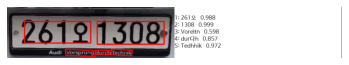

In [43]:
#실습
img_path = "./runs/detect/result/5m/carnumber/car15.jpg"
result = ocr_ko.ocr(img_path)
result_ocr(img_path, result)
carNumber = result[0][0][1]+result[0][1][1]
carNumber = carNumber[0]+carNumber[2]
print(carNumber)